In [1]:
#pip install thejoker

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import statistics as stat
import seaborn as sns
import thejoker as tj
import numpy as np
import arviz as az
import pymc as pm
import corner
import math 

from astropy.visualization.units import quantity_support
from sklearn.metrics import mean_squared_error
from thejoker import JokerPrior, TheJoker, RVData
from thejoker.plot import plot_rv_curves
from tqdm import tqdm

In [2]:
#Python3 program to calculate Root Mean Square 
 
#Function that Calculate Root Mean Square 
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
     
    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)
     
    #Calculate Mean 
    mean = (square / (float)(n))
     
    #Calculate Root
    root = math.sqrt(mean)
     
    return root

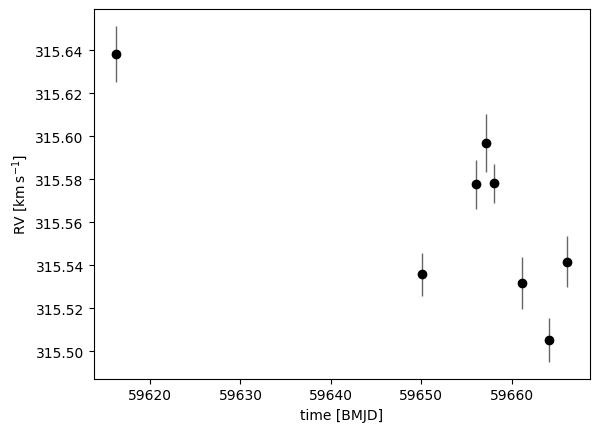

In [3]:
t = [59616.23644604064, 59650.10541174411, 59656.05310538688, 59657.12322433722, 59658.06083902933, 59661.1028844865, 59664.12167293875, 59666.11853265618]
rv = [315.6384, 315.5357, 315.5778, 315.5968, 315.5781, 315.5318, 315.5052, 315.5417] * u.km/u.s
err = [0.013, 0.0098, 0.0114, 0.0136, 0.0091, 0.012, 0.0102, 0.0118] * u.km/u.s
data = tj.RVData(t=t, rv=rv, rv_err=err)
ax = data.plot()  
#ax.set_xlim(-10, 200)  

In [5]:
np.mean(rv), np.std(rv), np.mean(err)

(<Quantity 315.5631875 km / s>,
 <Quantity 0.03998067 km / s>,
 <Quantity 0.0113625 km / s>)

In [6]:
print("semiamplitud de la velocidad K = ",((max(rv)-min(rv))/2).to("m/s"))

semiamplitud de la velocidad K =  66.599999999994 m / s


In [7]:
2**(28)

268435456

In [107]:
data = RVData(t=t, rv=rv, rv_err=err)
prior = JokerPrior.default(P_min=2*u.day, P_max=100*u.day,sigma_K0= ((max(rv)-min(rv))/2), sigma_v = np.mean(rv))
joker = TheJoker(prior)

print("Listo")

Listo


In [108]:
# prior

In [110]:
rng = np.random.default_rng(seed=42) # pequeño retraso en el tiempo 
prior_samples1 = prior.sample(size=1_500_000, rng=rng)

In [113]:
samples1 = joker.rejection_sample(data, prior_samples1, max_posterior_samples=256)
samples1 = samples1.wrap_K()
#samples1 = tj.JokerSamples.read("samples1.hdf5")

samples1.write("samples1.hdf5", overwrite=True)

In [114]:
samples1

<JokerSamples [P, e, omega, M0, s, K, v0] (34 samples)>

In [115]:
print("P: ",samples1["P"])
print("e",samples1["e"])
print("omega",samples1["omega"])
print("M0",samples1["M0"])
print("s",samples1["s"])
print("K",samples1["K"])
print("v0",samples1["v0"])

P:  [18.49163972  5.19082269 13.6460035  12.98687179  5.14921175 12.77714864
 10.68045518 20.84897818 10.17555212 13.60283594 10.55760545 14.60309027
 10.08737325 35.844927   12.95723418 12.89986348 10.7242301  13.03632431
 10.33609226 10.13244157  5.18444663 10.20031582 14.31871331 19.55751923
 10.96598363 10.52742852 13.56597251 13.65956322 13.20207996 18.48963316
 18.35050611 18.54230478 20.39916862 13.37075727] d
e [0.28968736 0.56843466 0.14127147 0.70535642 0.22609808 0.6311888
 0.28158809 0.43384874 0.27135355 0.02613993 0.27385446 0.6468525
 0.60400818 0.51724591 0.52832162 0.3354737  0.4825729  0.53516093
 0.03722994 0.54271067 0.33057526 0.49005612 0.56039759 0.18807973
 0.52974516 0.12523756 0.18722336 0.17371776 0.31391633 0.38055708
 0.49431435 0.2798093  0.54206601 0.46479766]
omega [ 5.05666053  0.8650967   0.02847439 -1.29900378  1.12420998  5.15896466
  2.53303632  1.31126464 -1.03985388  3.85471367  2.39893606  1.30616995
 -0.68210664  4.9917109   5.21819967  4.756571

(315.35, 315.8)

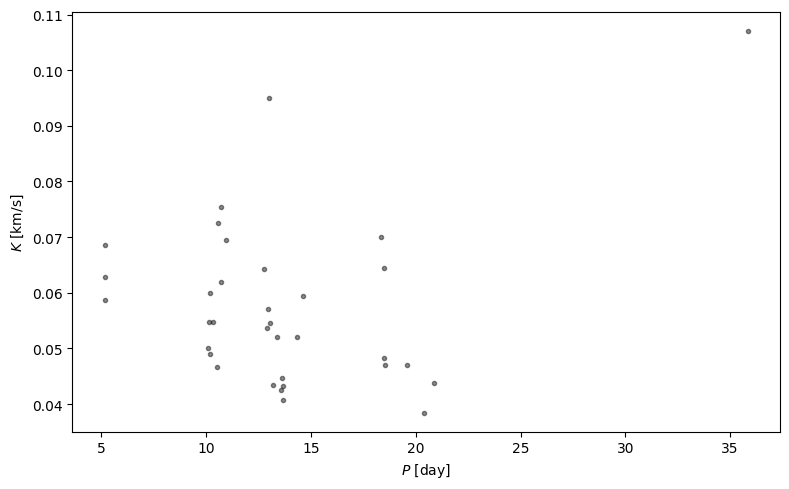

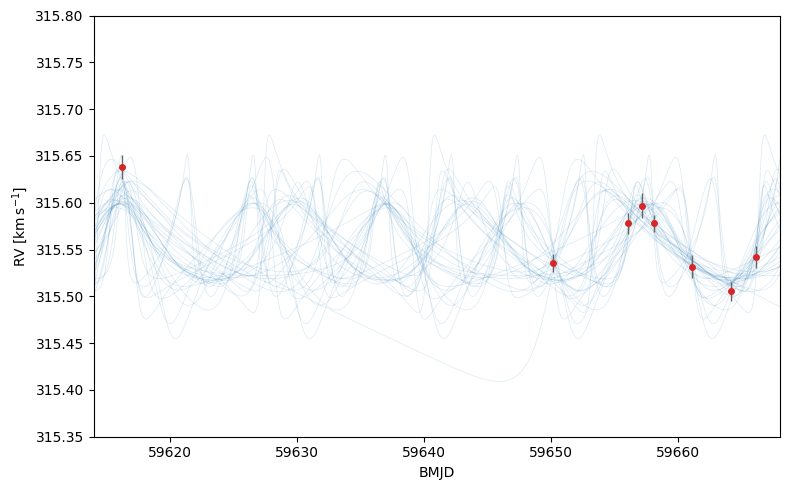

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
ax.scatter(samples1['P'].value, samples1['K'].to(u.km/u.s).value,marker='.', color='k', alpha=0.45)

ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")
#ax.set_xlim(0, 256)
#ax.set_ylim(0.75, 3.)

#ax.scatter(61.942, 1.3959, marker='o', color='#31a354', zorder=-100)

fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
t_grid = np.linspace(59614, 59668, 1024)
#t_grid = np.linspace(59648, 59668, 1024)

_ = tj.plot_rv_curves(samples1,data=data,plot_kwargs=dict(color="tab:blue"),data_plot_kwargs=dict(color="tab:red"),relative_to_t_ref=False,ax=ax)

ax.set_xlim(59614, 59668)
#ax.set_xlim(59648, 59668)
ax.set_ylim(315.35,315.8)

In [94]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 5), layout="tight")
# for j in range(len(samples)):
#     _ = tj.plot_phase_fold(samples[j], data=data)

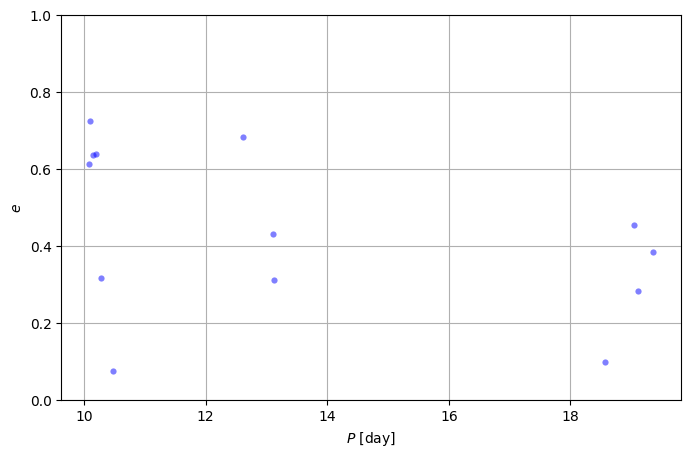

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(samples1["P"], samples1["e"], s=20, lw=0, alpha=0.5, color = 'blue')

#ax.set_xscale("log")
#ax.set_xlim(1, 1e2)
ax.set_ylim(0, 1)

ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$e$")
ax.grid()

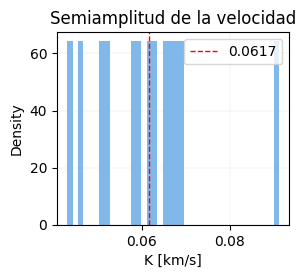

El pico más alto está en el valor: 0.06173184752831036


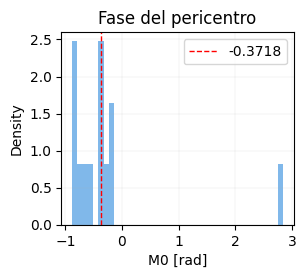

El pico más alto está en el valor: -0.3717778389308804


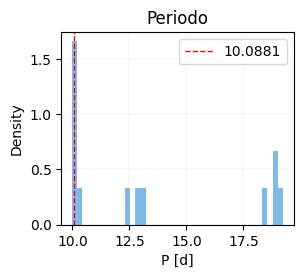

El pico más alto está en el valor: 10.088112085795265


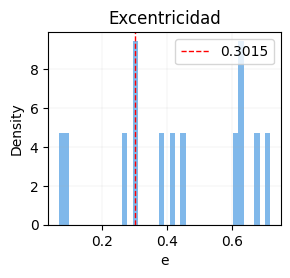

El pico más alto está en el valor: 0.301468532387477


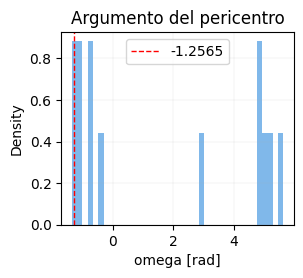

El pico más alto está en el valor: -1.2564704424721558


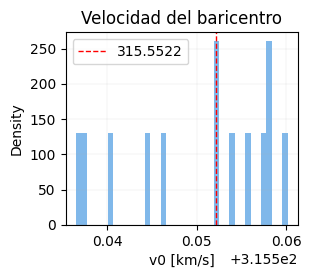

El pico más alto está en el valor: 315.5521854129902


In [96]:
variables = ["K","M0","P","e","omega","v0"]
xlabel = ["K [km/s]","M0 [rad]","P [d]","e","omega [rad]","v0 [km/s]"]
title = ["Semiamplitud de la velocidad","Fase del pericentro","Periodo","Excentricidad","Argumento del pericentro","Velocidad del baricentro"]
picos = []

for i in range(len(variables)):
    plt.figure(figsize=(3,2.5))
    plt.ylabel("Density")
    plt.xlabel(xlabel[i])
    plt.title(title[i])
    conteos, bins, _  =  plt.hist(samples1[variables[i]].value, bins = 40 ,density = True ,alpha=0.7, align = 'left', color = '#4B9BE2')
    
    plt.grid(linestyle='-', linewidth=0.1)
    
    # Encontrar el índice del valor máximo en los conteos
    indice_maximo = np.argmax(conteos)
    
    # Obtener el valor del pico más alto
    pico_mas_alto = bins[indice_maximo]
    picos.append(bins[indice_maximo])
    # Agregar una línea vertical en el pico más alto
    plt.axvline(x=pico_mas_alto, color='red', linestyle='--', linewidth = 1, label = f"{round(pico_mas_alto,4)}")
    
    
    # Mostrar el histograma con el pico más alto resaltado
    plt.legend()
    plt.show()
    
    print("El pico más alto está en el valor:", pico_mas_alto)



### Muestra MCMC

In [21]:
with prior.model:
    mcmc_init = joker.setup_mcmc(data, samples)
    trace = pm.sample(tune=500, draws=500, start=mcmc_init, cores=1, chains=2)

/tmp/ipykernel_4110/1984993535.py:3: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(tune=500, draws=500, start=mcmc_init, cores=1, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [e, __omega_angle1, __omega_angle2, __M0_angle1, __M0_angle2, P, K, v0]


Output()

Output()

Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 57 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [22]:
az.summary(trace, var_names=prior.par_names)

/home/alexandert/.local/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
P,11.150,0.808,10.010,12.458,0.092,0.068,171.0,70.0,1.01
e,0.157,0.126,0.000,0.384,0.007,0.005,321.0,366.0,1.00
omega,0.761,1.657,-2.569,3.081,0.105,0.078,297.0,551.0,1.00
M0,-0.024,2.168,-3.118,2.880,0.125,0.116,431.0,585.0,1.02
s,0.000,0.000,0.000,0.000,0.000,0.000,1000.0,1000.0,NaN
K,-0.042,0.008,-0.056,-0.026,0.001,0.001,168.0,154.0,1.01
v0,315.545,0.005,315.536,315.555,0.000,0.000,345.0,497.0,1.00


In [23]:
mcmc_samples = tj.JokerSamples.from_inference_data(prior, trace, data)
mcmc_samples = mcmc_samples.wrap_K()

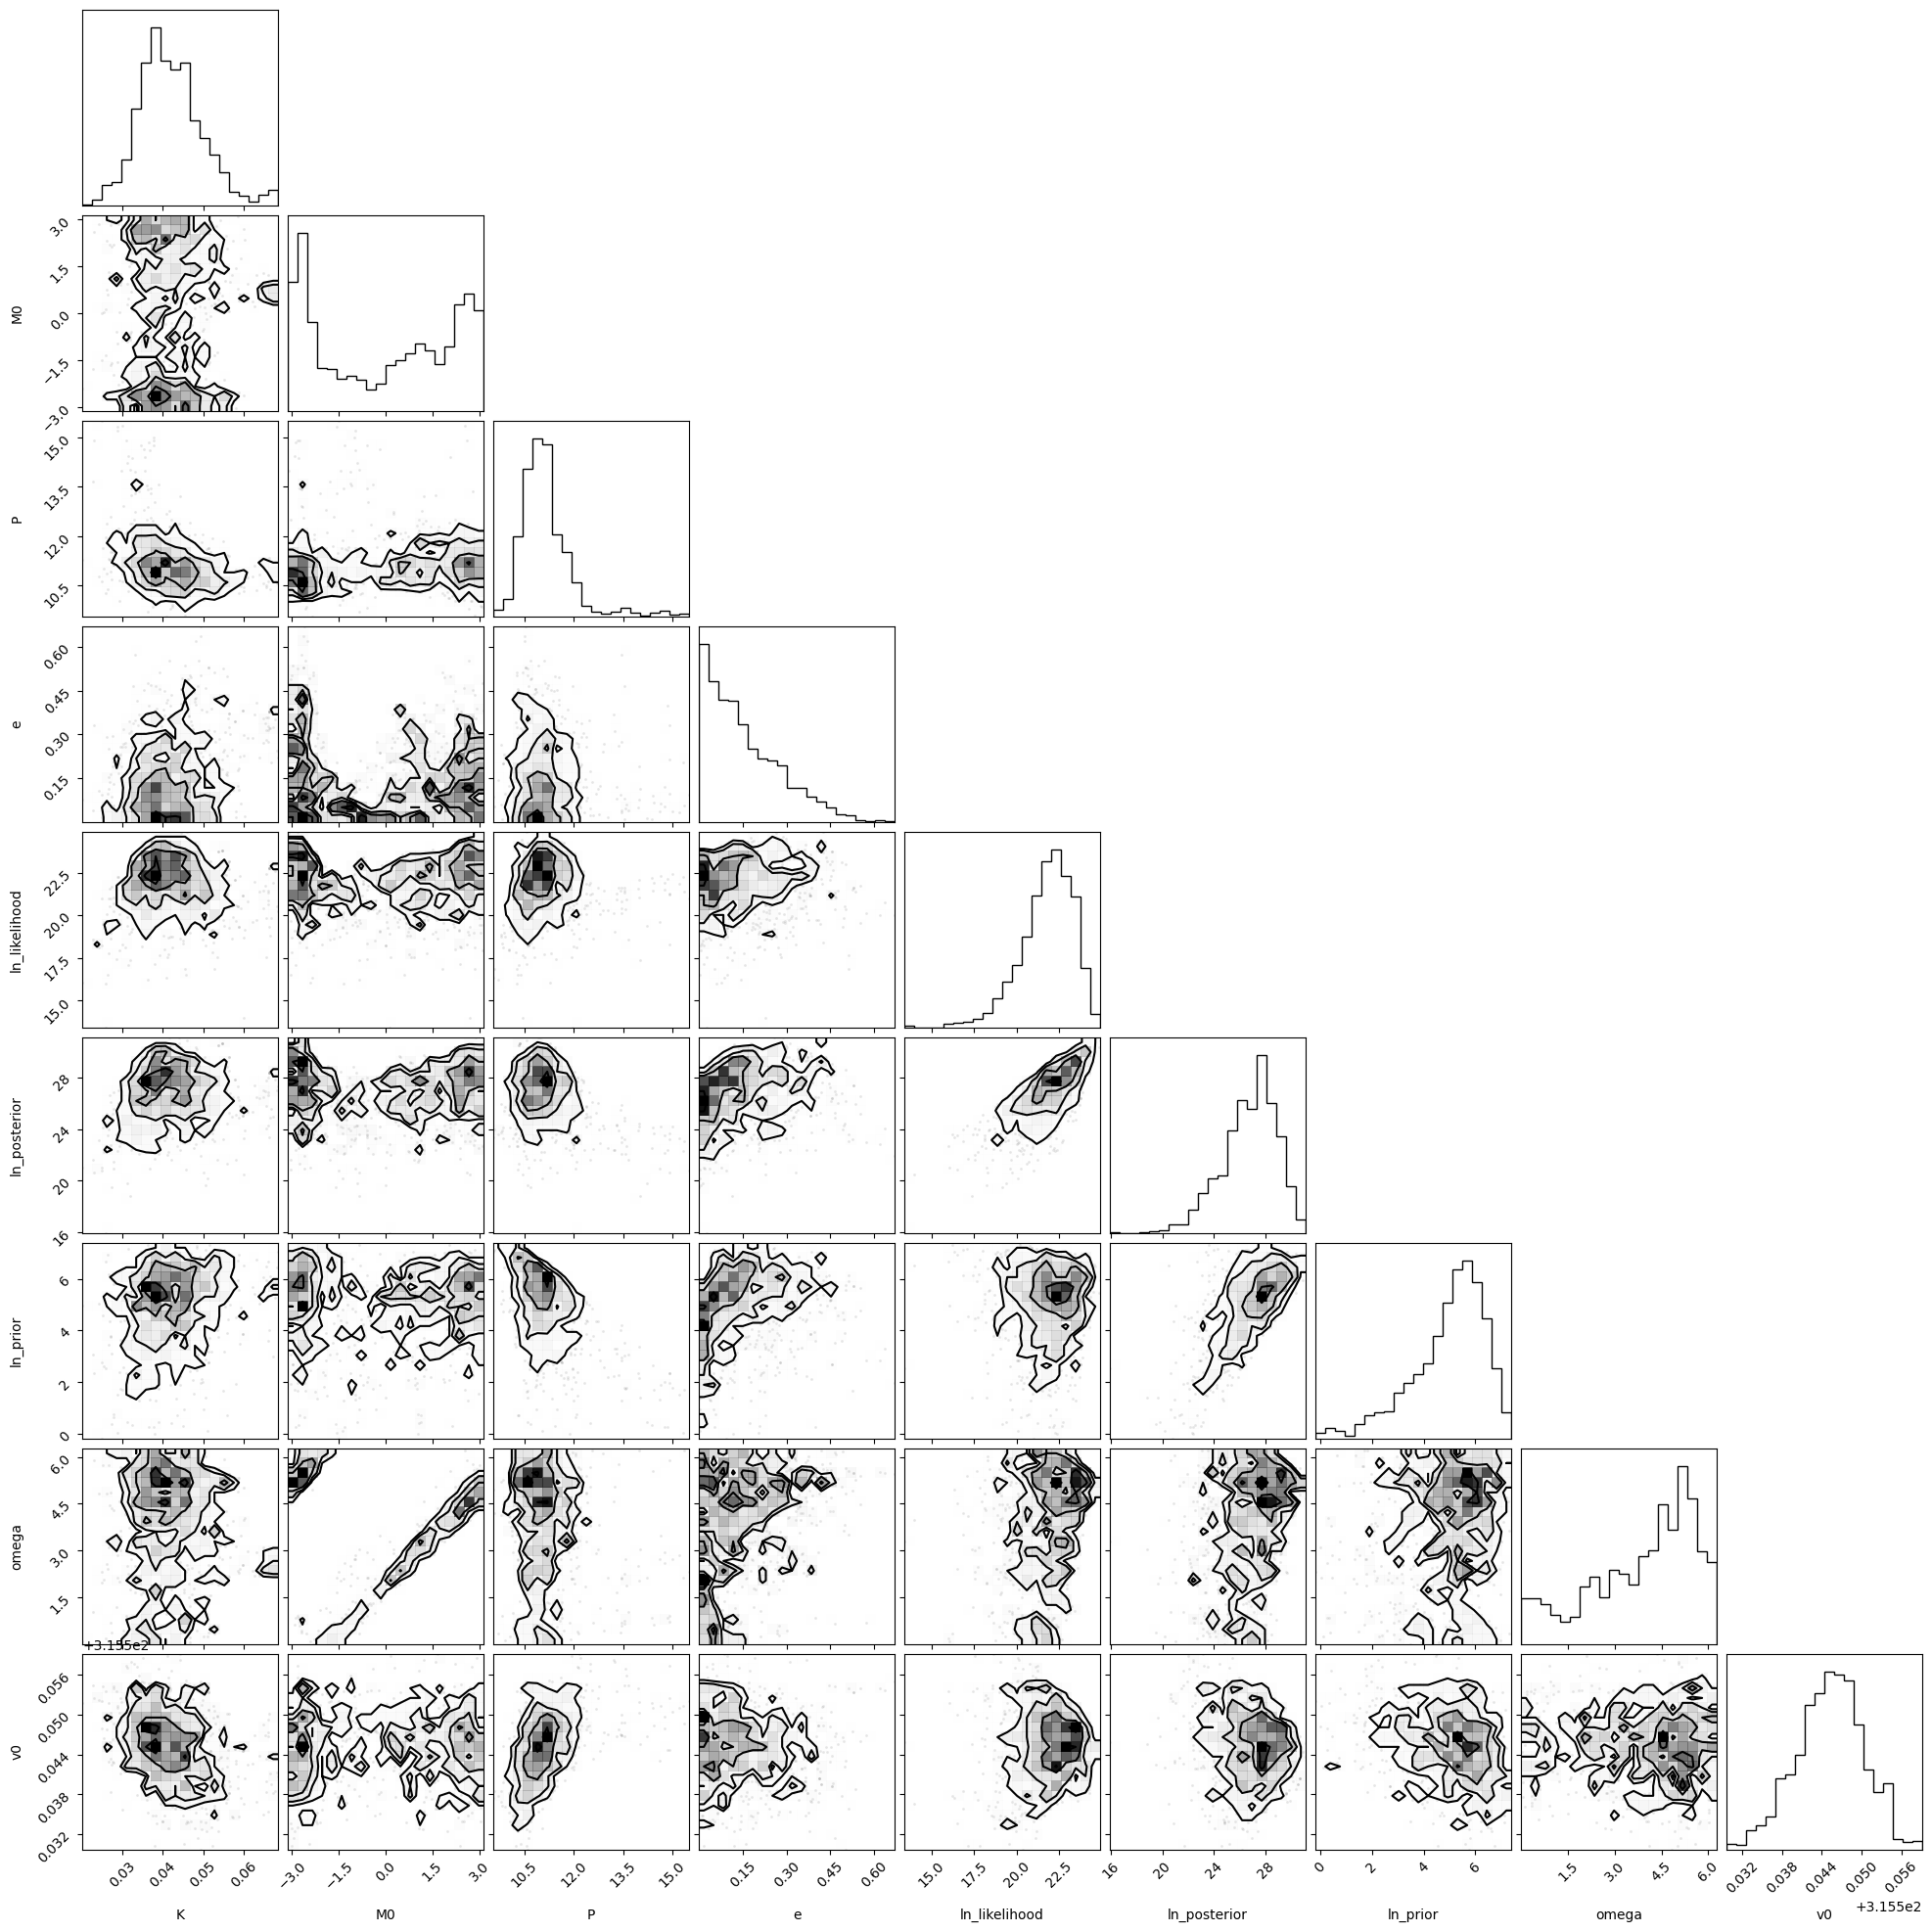

In [24]:
df = mcmc_samples.tbl.to_pandas()
colnames = mcmc_samples.par_names
colnames.pop(colnames.index("s"))
_ = corner.corner(df[colnames])

### Grafico de distribuciones

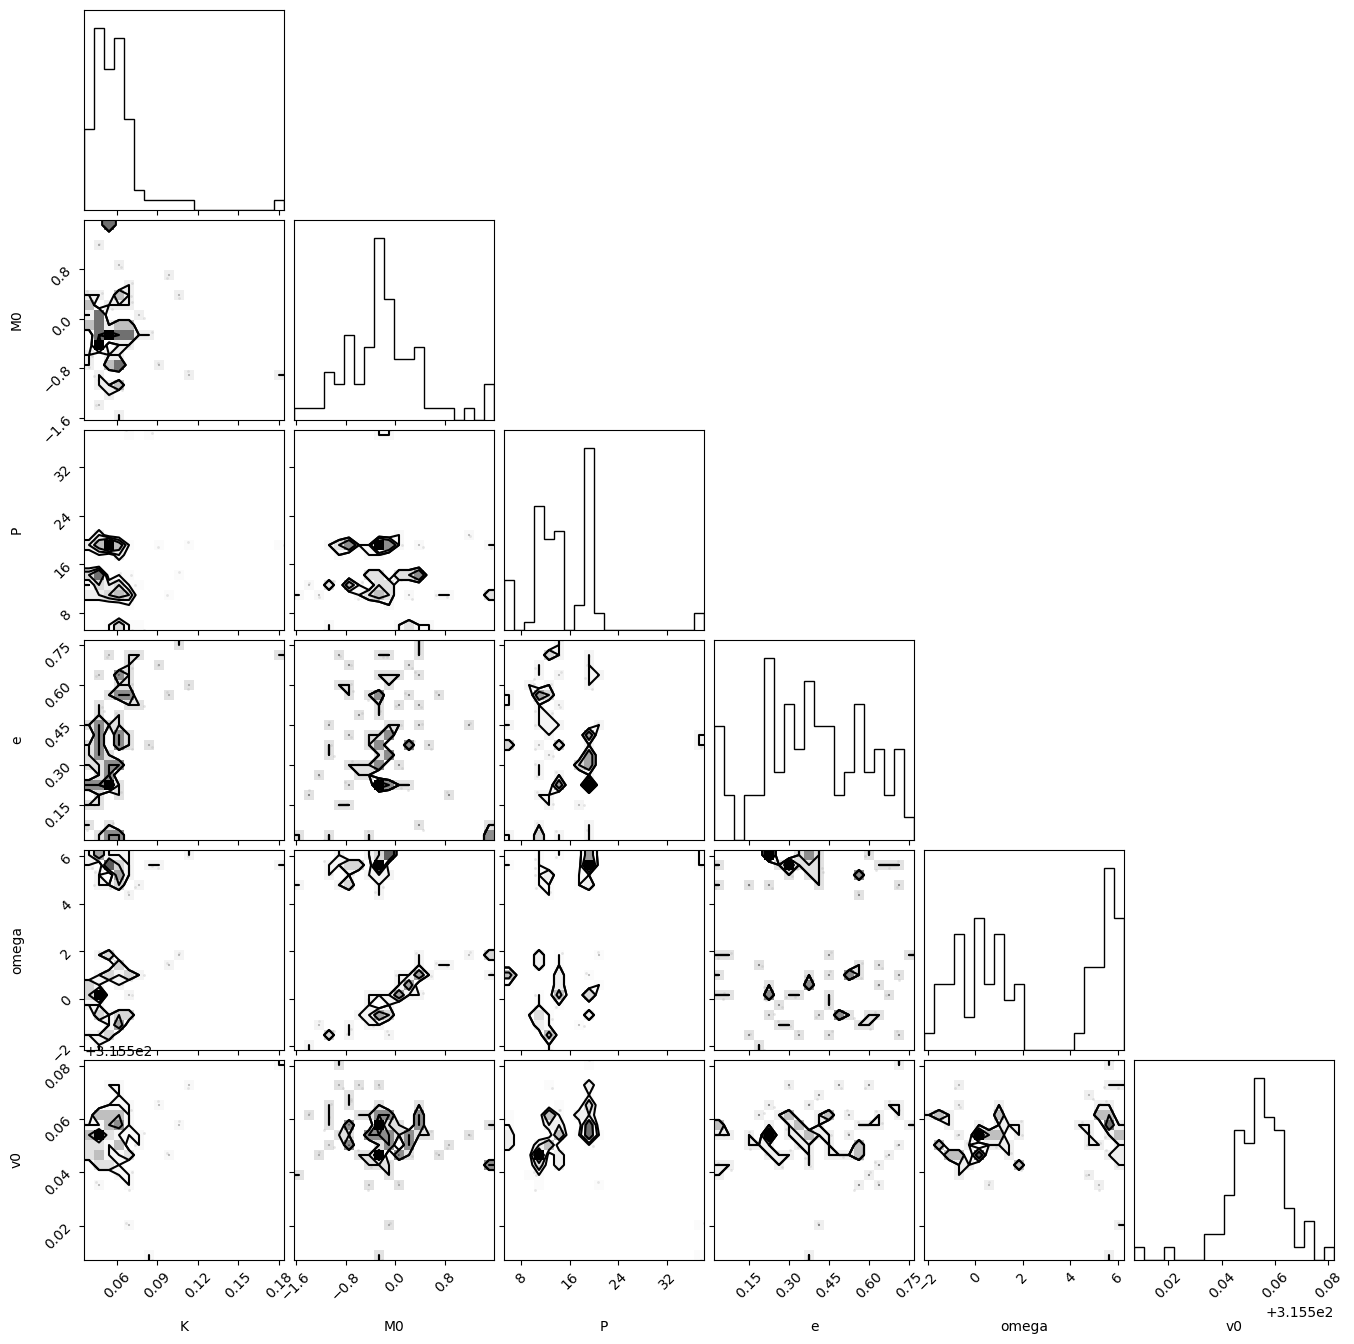

In [12]:
df = samples1.tbl.to_pandas()
colnames = samples1.par_names
colnames.pop(colnames.index("s"))
_ = corner.corner(df[colnames])

In [44]:
# Crear un gráfico de correlación utilizando pairplot
g = sns.PairGrid(df, 
            x_vars=["K", "M0", "P", "e", "omega", "v0"],
            y_vars=["K", "M0", "P", "e", "omega", "v0"],
            #plot_kws=dict(marker=".", linewidth=1),        # Edito los scatter
            #diag_kws=dict(fill=False),                     # Edito los histogramas
            corner=True)                                   # No muestra las de encima de la diagonal
# Mostrar el gráfico

g.map_diag(plt.hist,  bins = 40 ,density = False ,alpha=0.7, align = 'left', color = '#4B9BE2')             #Histogramas en la diagonal
g.map_lower(sns.kdeplot,linewidths = 1, levels=6,  color=".2",thresh=.1)             # Muestra los contornos
g.map_lower(sns.scatterplot,s = 3, color="blue")                     # Muestra los puntos
#plt.show()

NameError: name 'df' is not defined

In [45]:
variables = ["K","M0","P","e","omega","v0"]
for i in variables:
    print("--"*20)
    print("\x1b[1;35m"+f"Datos de distribución de : {i}"+"\033[0m")
    print("Media: ",stat.mean(samples1[i].value))
    print("Moda: ",stat.mode(samples1[i]))
    print("Mediana: ",stat.median(samples1[i]))
print("--"*20)

----------------------------------------
Datos de distribución de : K
Media:  0.05924282561438467
Moda:  0.05525087197960336 km / s
Mediana:  0.055775682280888056 km / s
----------------------------------------
Datos de distribución de : M0
Media:  -0.035212725961746995
Moda:  -0.08784645577831685 rad
Mediana:  -0.11553958577565793 rad
----------------------------------------
Datos de distribución de : P
Media:  11.923345894388214
Moda:  18.79181046485472 d
Mediana:  10.698467365461898 d
----------------------------------------
Datos de distribución de : e
Media:  0.4014617761615027
Moda:  0.38855506202875784
Mediana:  0.402128830944688
----------------------------------------
Datos de distribución de : omega
Media:  1.6467197133989304
Moda:  5.90009479970692 rad
Mediana:  0.9757712390023647 rad
----------------------------------------
Datos de distribución de : v0
Media:  315.5539163131509
Moda:  315.5567767806191 km / s
Mediana:  315.5546336170245 km / s
-----------------------------

Número de muestras mínimas establecidas (estas serían los datos resultantes, los aprovados, los posteriores admitidos)

$$M_{min} = 128$$

Resolución del periodo:

$$Δ =  \frac{4P^2}{2\pi T}$$

Los tres resultados posibles son los siguientes:
1. $M >> M_{min}$ muestras sobreviven al rechazo. En este caso, hemos terminado.
   
3. $M < M_{min}$ muestras sobreviven al rechazo, y estas muestras tienen una varianza de raíz (rms) en el parámetro de periodo P que es menor que Δ (es decir, no dan ninguna indicación de ambigüedad de periodo). En este caso suponemos que la pdf posterior es efectivamente unimodal, y utilizamos las muestras supervivientes (o muestra) para inicializar un muestreo MCMC utilizando el paquete emcee (Foreman-Mackey et al. 2013).
   
5. $M < M_{min}$ muestras sobreviven al rechazo, y estas muestras abarcan un intervalo de periodos mayor que Δ. En este caso, iteramos el procedimiento de muestreo de rechazo: generamos nuevos muestreos pdf previos y muestreos de rechazo hasta que el número de muestras supervivientes sea mayor que Mmin. Esto es costoso.

In [97]:
P = np.median(samples1["P"])
T = 49*u.d
Δ =  (4*P**2)/(2*np.pi*T)
print("Δ = ",Δ) 

Δ =  2.0687857095897995 d


In [98]:
root_var = np.sqrt(np.var(samples1["P"]))
print("root variance = ",root_var)

root variance =  3.805060068926347 d


In [99]:
if (Δ>root_var):
    print("Se debe realizar el paso 2, es decir:")
    print("En este caso suponemos que la pdf posterior es efectivamente unimodal, y utilizamos las muestras supervivientes (o muestra) para inicializar un muestreo MCMC utilizando el paquete emcee.")
elif (Δ<root_var):
    print("Se debe realizar el paso 3, es decir:")
    print("En este caso, iteramos el procedimiento de muestreo de rechazo: generamos nuevos muestreos pdf previos y muestreos de rechazo hasta que el número de muestras supervivientes sea mayor que Mmin.")

Se debe realizar el paso 3, es decir:
En este caso, iteramos el procedimiento de muestreo de rechazo: generamos nuevos muestreos pdf previos y muestreos de rechazo hasta que el número de muestras supervivientes sea mayor que Mmin.


In [100]:
samples1

<JokerSamples [P, e, omega, M0, s, K, v0] (13 samples)>

In [101]:
tj.is_P_unimodal(samples1, data)

False

### Función de masa binaria
$$f(M) = \frac{M_2 \sin^3(i)}{(1+q)^2} = \frac{PK_1^3 (1-e^2)^{3/2}}{2\pi G}$$

Con $q = \frac{M_1}{M_2}$

### Prueba estrella con planeta HD 1397b del artículo. 

In [16]:
P = 0.866605*u.d
e = 0.007
K = 122.7*1000*u.m*1/u.s
G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2

In [17]:
f = (P*K**3*(1-e**2)**(3/2))/(2*np.pi*G)
f = f.cgs
f = (f/(1.989e+33*u.g)*u.M_sun)
f

<Quantity 0.16581214 solMass>

In [18]:
M1 = 1.65*u.M_sun

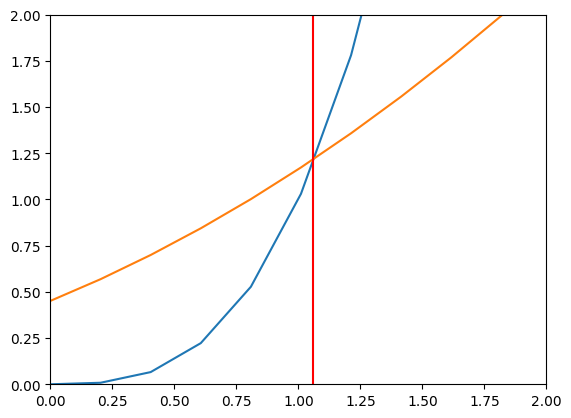

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 20, 100)
plt.plot(
    x, x**3, 
    x, (M1.value + x)**2*f.value
)
plt.ylim(0,2)
plt.xlim(0,2)
plt.axvline(1.06, color = 'red');


plt.show()

In [20]:
import numpy as np

def resolver_ecuacion_cubica(a, b, c, d):
    coeficientes = [a, b, c, d]
    raices = np.roots(coeficientes)
    return raices

# Ejemplo de uso
a = 1
b = -f.value
c = -2*M1.value*f.value
d = -M1.value**2*f.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

Las raíces de la ecuación son: [ 1.07067129+0.j         -0.45242958+0.46576188j -0.45242958-0.46576188j]


### Nuestro caso

In [239]:
# En nuestro caso

P = 9.980983858168003*u.d #np.mean(samples1["P"]) #
e = 0.5258818090383209 #np.mean(samples1["e"]) #
K = (0.03902078200527467)*1000*u.m*1/u.s  #np.mean(samples1["K"]).value*1000*u.m*1/u.s #

In [240]:
def f(P,e,K):
    G = 6.67430e-11*(u.m)**3*1/u.kg * 1/u.s**2
    f = (P*K**3*(1-e**2)**(3/2))/(2*np.pi*G)
    f = f.cgs
    f = (f/(1.989e+33*u.g)*u.M_sun)
    return f

In [241]:
f_value = f(P,e,K)
print(P)
print(f_value)

9.980983858168003 d
3.779774563556256e-11 solMass


In [242]:
M1 = 0.8*u.M_sun

In [243]:
sini =  1

In [244]:
np.arcsin(sini)*180/np.pi

90.0

In [245]:
# Ejemplo de uso
def resolver_ecuacion_cubica(a, b, c, d):
    coeficientes = [a, b, c, d]
    raices = np.roots(coeficientes)
    return raices
    
a = (sini)**3
b = -f_value.value
c = -2*M1.value*f_value.value
d = -M1.value**2*f_value.value

raices = resolver_ecuacion_cubica(a, b, c, d)
print("Las raíces de la ecuación son:", raices)

Las raíces de la ecuación son: [ 0.00028928+0.j        -0.00014464+0.0002504j -0.00014464-0.0002504j]


In [246]:
M2 = raices[0].real*u.M_sun
M_jupiter = 1.898e27*u.kg
print("La masa del objeto en M_Sun, M2 = ",M2)
print("La masa del objeto en kg, M2 = ",M2.to("kg"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_jup"))
print("La masa del objeto en M_J, M2 = ",M2.to("M_earth"))

La masa del objeto en M_Sun, M2 =  0.00028928103727989137 solMass
La masa del objeto en kg, M2 =  5.752092699331069e+26 kg
La masa del objeto en M_J, M2 =  0.3030408386996261 jupiterMass
La masa del objeto en M_J, M2 =  96.31498689701603 earthMass


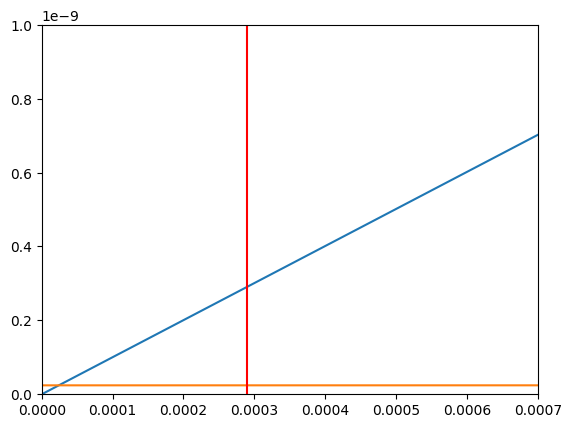

In [247]:
x = np.linspace(0, raices[0].real+1, 1000)

plt.plot(x, x**3*((sini)**3), x, (M1.value + x)**2*f_value.value)
# 
#plt.ylim(-0.5e-9,10e-9)
plt.xlim(0,0.0007)
plt.ylim(0,1e-9)

#plt.xlim(0,raices[0].real)
plt.axvline(M2.value, color = 'red');


plt.show()